5232
5232


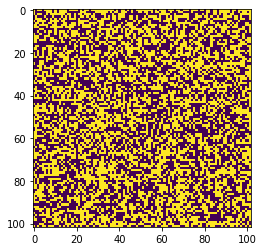

5406
5406


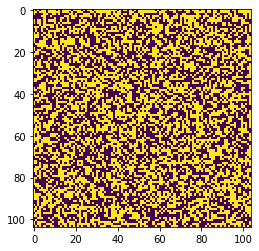

In [11]:
FILENAME = '/home/surface/development/advent/puzzle20/data/input'

import matplotlib.pyplot as plt

base_mapping = []
with open(FILENAME) as file:
    for idx, line in enumerate(file):
        if idx == 0:
            base_code = [0 if x == '.' else 1 for x in line.strip()]
        elif idx > 1:
            base_mapping.append([0 if x == '.' else 1 for x in line.strip()])

def eval_cell(input_map):
    value = ''
    for i in input_map:
        for j in i:
            value += str(j)
    return base_code[int(value, 2)]


def trim_image(base_mapping):
    current_base_size = len(base_mapping)
    row_sum = [sum(x) for x in base_mapping]
    col_sum = [sum([y[x] for y in base_mapping]) for x in range(current_base_size)]

    for i in range(current_base_size):
        if row_sum[i] > 0 or row_sum[-i] > 0 or col_sum[i] > 0 or col_sum[-i] > 0:
            break
    new_size = current_base_size - i * 2

    base_layer = [[0 for _ in range(new_size)] for _ in range(new_size)]
    for s_i in range(new_size):
        for s_j in range(new_size):
            base_layer[s_i][s_j] = base_mapping[s_i + i][s_j + i]
    return base_layer


def enhance_image(base_mapping):
    current_base_size = len(base_mapping)
    current_size = current_base_size + 4

    base_layer = [[0 for _ in range(current_size)] for _ in range(current_size)]
    intermediate_layer = [[0 for _ in range(current_size)] for _ in range(current_size)]
    for i in range(current_base_size):
        for j in range(current_base_size):
            intermediate_layer[i + 2][j + 2] = base_mapping[i][j]

    for i in range(1, current_size - 1):
        for j in range(1, current_size - 1):
            base_layer[i][j] = eval_cell([x[j-1:j+2] for x in intermediate_layer[i-1:i+2]])

    return base_layer

n = 2
base_layer = base_mapping
for _ in range(n):
    base_layer = enhance_image(base_layer)
    print(sum([sum(x) for x in base_layer]))
    base_layer = trim_image(base_layer)
    print(sum([sum(x) for x in base_layer]))

    plt.imshow(base_layer, interpolation='none')
    plt.show()
